In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
path="/content/drive/MyDrive/processphuclongcoffeeandtea.npy"
post_list = np.load(path,allow_pickle=True)
post_df_full = pd.read_excel("/content/drive/MyDrive/processphuclongcoffeeandtea.xlsx")

In [ ]:
post_df_full=post_df_full
post_df_full.head(1)

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,718610463644567,"🔥TIN HOT🔥\nSau vài ngày làm mưa làm gió, ước t...","🔥TIN HOT🔥\nSau vài ngày làm mưa làm gió, ước t...",NaN,NaN,2023-10-21 06:18:31,1697869111,https://scontent-ord5-2.xx.fbcdn.net/v/t39.308...,https://scontent-ord5-2.xx.fbcdn.net/v/t39.308...,['https://scontent-ord5-2.xx.fbcdn.net/v/t39.3...,...,https://www.facebook.com/phuclongcoffeeandtea/...,"{'thích': 556, 'yêu thích': 69, 'haha': 9, 'wo...",664,NaN,430176977051947,NaN,7.186160e+14,['718615970310683'],False,2023-10-22 17:19:40.720


#sự phát triển theo ngày

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
post_df_full1=post_df_full
post_df_full1[['post_id', 'reactions']]

,post_id,reactions
0,718610463644567,"{'thích': 556, 'yêu thích': 69, 'haha': 9, 'wo..."
1,717989773706636,"{'thích': 143, 'yêu thích': 28, 'haha': 2, 'wo..."
2,717462083759405,"{'thích': 921, 'yêu thích': 126, 'haha': 21, '..."
3,716719347167012,"{'thích': 441, 'yêu thích': 80, 'haha': 4, 'wo..."
4,716393713866242,"{'thích': 2776, 'yêu thích': 180, 'haha': 640,..."
5,715189213986692,"{'thích': 2400, 'yêu thích': 341, 'haha': 13, ..."
6,713885100783770,"{'thích': 1347, 'yêu thích': 234, 'haha': 123,..."
7,713115254194088,"{'thích': 396, 'yêu thích': 38, 'haha': 3, 'wo..."
8,711911887647758,"{'thích': 192, 'yêu thích': 23, 'haha': 1, 'th..."
9,711247407714206,"{'thích': 355, 'yêu thích': 9, 'haha': 3, 'thư..."


In [ ]:

post_df_full2=post_df_full[['time','timestamp' ,'reaction_count']]
post_df_full2

,time,timestamp,reaction_count
0,2023-10-21 06:18:31,1697869111,664
1,2023-10-20 01:27:56,1697765276,180
2,2023-10-19 04:48:28,1697690908,1076
3,2023-10-18 00:00:56,1697587256,542
4,2023-10-17 11:35:00,1697542500,3825
5,2023-10-15 12:01:02,1697371262,2787
6,2023-10-13 12:01:41,1697198501,1735
7,2023-10-12 10:20:22,1697106022,441
8,2023-10-10 12:00:31,1696939231,217
9,2023-10-09 09:58:57,1696845537,369


In [ ]:

dates=post_df_full2['timestamp'].to_list()
y=post_df_full2['reaction_count'].to_list()
dates.reverse()
y.reverse()
print(len(dates),len(y))
print(dates)
print(y)

# type(y[0])
# dates

10 10
[1696845537, 1696939231, 1697106022, 1697198501, 1697371262, 1697542500, 1697587256, 1697690908, 1697765276, 1697869111]
[369, 217, 441, 1735, 2787, 3825, 542, 1076, 180, 664]


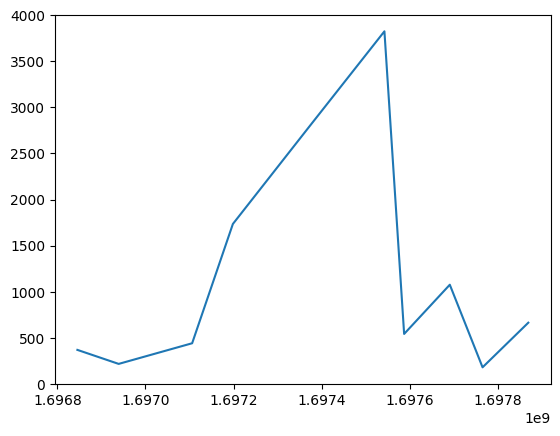

In [ ]:

# biểu đồ thể hiện hiệu xuất react của các bài đăng theo thời gian từ xa ngày hiện tại đến hiện tại
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.plot(dates,y)
plt.show()

#phân tích từng loại lượt react theo ngày

In [ ]:


post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )

In [ ]:

# gộp các cột lại vào dataframe
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_full_with_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,"🔥TIN HOT🔥\nSau vài ngày làm mưa làm gió, ước t...",556.0,69.0,9.0,17.0,10.0,NaN,3.0,16,157,664
1,🌸MỪNG NGÀY PHỤ NỮ VIỆT NAM🌸\n\nPhúc Long xin c...,143.0,28.0,2.0,1.0,NaN,NaN,6.0,4,28,180
2,"""Đố ai định nghĩa được chữ xinh.\nCó khó gì đâ...",921.0,126.0,21.0,3.0,1.0,NaN,4.0,27,254,1076
3,🌸QUÁ LÀ HOT LUÔN!!!\n\nLy đổi màu Phúc Long ph...,441.0,80.0,4.0,9.0,1.0,NaN,7.0,28,311,542
4,🧋CUNG HOÀNG ĐẠO CỦA CÁC MÓN PHÚC LONG\nCác cun...,2776.0,180.0,640.0,17.0,9.0,1.0,202.0,186,1507,3825
5,🧋LY ĐỔI MÀU TRỞ LẠI VỚI PHIÊN BẢN MỪNG NGÀY 20...,2400.0,341.0,13.0,18.0,4.0,1.0,10.0,154,2319,2787
6,🌸ÚM BA LA ĐỔI MÀU NHA!!!\n\nMột sản phẩm luôn ...,1347.0,234.0,123.0,18.0,3.0,1.0,9.0,184,1984,1735
7,"Sướng nhất Fan nhà Phúc Long rồi nha, mấy hôm ...",396.0,38.0,3.0,2.0,NaN,2.0,NaN,19,142,441
8,"🧋TRÀ KEM SỮA DI SẢN PHÚC LONG🧋\n\nBộ sưu tập ""...",192.0,23.0,1.0,NaN,NaN,NaN,1.0,4,21,217
9,🧋ĐÂY LÀ TÊN CỦA 3 MÓN PHÚC LONG\n\nVà bạn có b...,355.0,9.0,3.0,NaN,NaN,NaN,2.0,70,367,369


In [ ]:
for i in range(0, len(post_df_full_with_reactions['thích'].values), 1):
    if pd.isna(post_df_full_with_reactions['thích'].values[i]):
        post_df_full_with_reactions['thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['yêu thích'].values[i]):
        post_df_full_with_reactions['yêu thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['haha'].values[i]):
        post_df_full_with_reactions['haha'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['wow'].values[i]):
        post_df_full_with_reactions['wow'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['buồn'].values[i]):
        post_df_full_with_reactions['buồn'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['phẫn nộ'].values[i]):
        post_df_full_with_reactions['phẫn nộ'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['thương thương'].values[i]):
        post_df_full_with_reactions['thương thương'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['shares'].values[i]):
        post_df_full_with_reactions['shares'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['comments'].values[i]):
        post_df_full_with_reactions['comments'].values[i] = 0

post_df_full_with_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,"🔥TIN HOT🔥\nSau vài ngày làm mưa làm gió, ước t...",556.0,69.0,9.0,17.0,10.0,0.0,3.0,16,157,664
1,🌸MỪNG NGÀY PHỤ NỮ VIỆT NAM🌸\n\nPhúc Long xin c...,143.0,28.0,2.0,1.0,0.0,0.0,6.0,4,28,180
2,"""Đố ai định nghĩa được chữ xinh.\nCó khó gì đâ...",921.0,126.0,21.0,3.0,1.0,0.0,4.0,27,254,1076
3,🌸QUÁ LÀ HOT LUÔN!!!\n\nLy đổi màu Phúc Long ph...,441.0,80.0,4.0,9.0,1.0,0.0,7.0,28,311,542
4,🧋CUNG HOÀNG ĐẠO CỦA CÁC MÓN PHÚC LONG\nCác cun...,2776.0,180.0,640.0,17.0,9.0,1.0,202.0,186,1507,3825
5,🧋LY ĐỔI MÀU TRỞ LẠI VỚI PHIÊN BẢN MỪNG NGÀY 20...,2400.0,341.0,13.0,18.0,4.0,1.0,10.0,154,2319,2787
6,🌸ÚM BA LA ĐỔI MÀU NHA!!!\n\nMột sản phẩm luôn ...,1347.0,234.0,123.0,18.0,3.0,1.0,9.0,184,1984,1735
7,"Sướng nhất Fan nhà Phúc Long rồi nha, mấy hôm ...",396.0,38.0,3.0,2.0,0.0,2.0,0.0,19,142,441
8,"🧋TRÀ KEM SỮA DI SẢN PHÚC LONG🧋\n\nBộ sưu tập ""...",192.0,23.0,1.0,0.0,0.0,0.0,1.0,4,21,217
9,🧋ĐÂY LÀ TÊN CỦA 3 MÓN PHÚC LONG\n\nVà bạn có b...,355.0,9.0,3.0,0.0,0.0,0.0,2.0,70,367,369


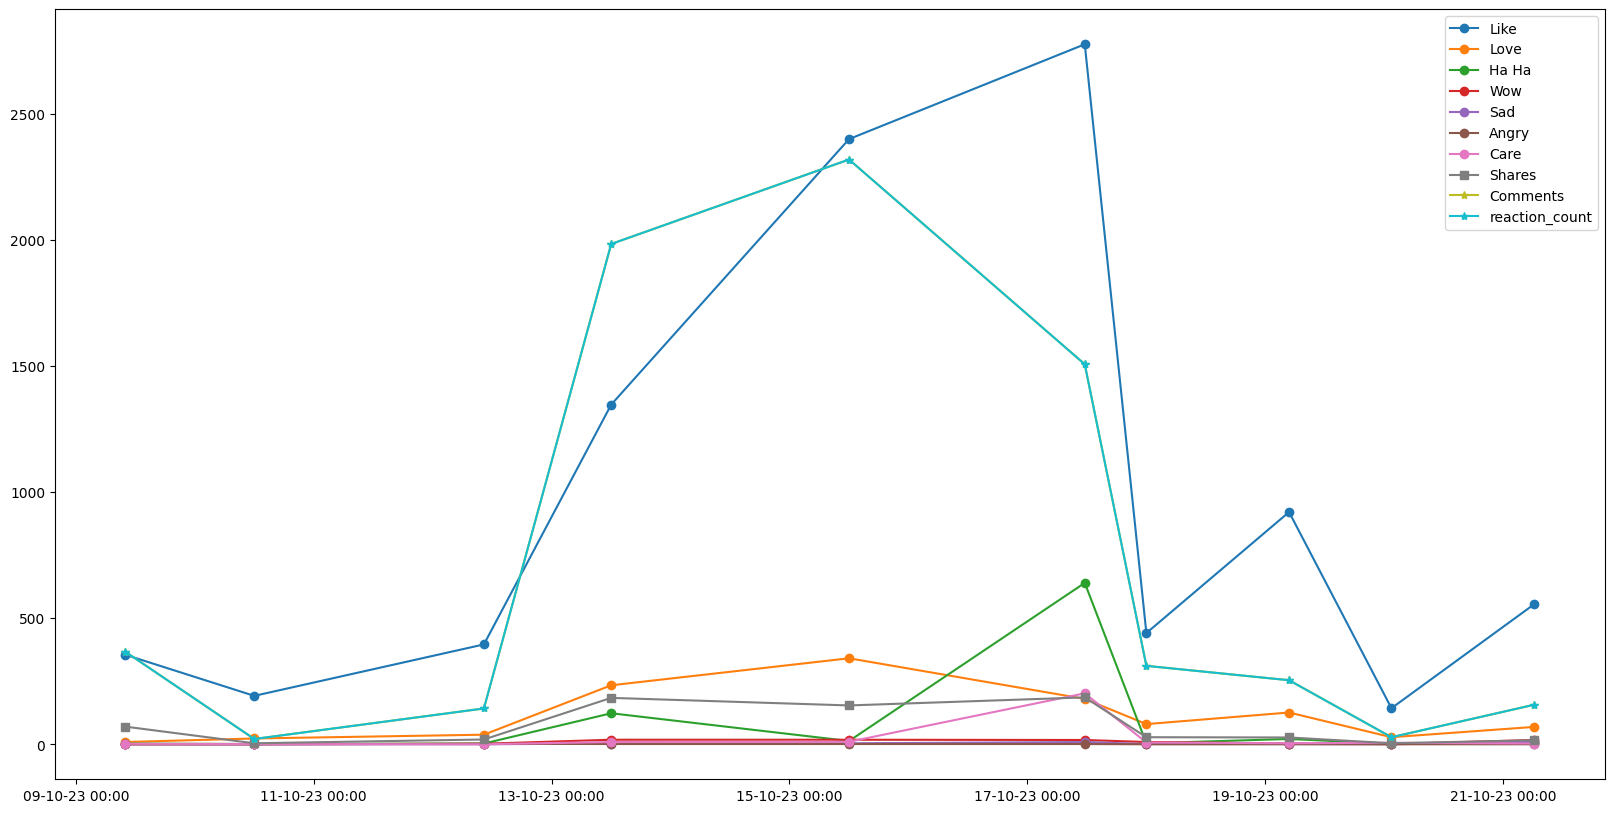

In [ ]:

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['thích'], label = "Like", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['yêu thích'], label = "Love", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['haha'], label = "Ha Ha", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['wow'], label = "Wow", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['buồn'], label = "Sad", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['phẫn nộ'], label = "Angry", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['thương thương'], label = "Care", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['shares'], label = "Shares", marker="s")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "Comments", marker="*")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "reaction_count", marker="*")

plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

In [ ]:

# hiểm thị mối quan hệ Like, Love, Ha Ha, Wow, Sad, Angry, Care với cột Share
print(post_df_full_with_reactions[['thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương']].corrwith(post_df_full_with_reactions['shares']))


thích            0.870610
yêu thích        0.803465
haha             0.649479
wow              0.723565
buồn             0.433950
phẫn nộ          0.449370
thương thương    0.574465
dtype: float64
